In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

D:\Users\sriganesh.su\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
RMLEng468Data = pandas.read_csv('D:/Projects/ASDDIDF/Yanmar/24-01-2018/Data/rml468Data.csv',sep=',')

In [4]:
datasetTrain = RMLEng468Data.values
X = datasetTrain[:,0:5]
Y = datasetTrain[:,5]
validationSize = 0.2
seed = 7
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size=validationSize,random_state=seed)

testModel = RandomForestRegressor()
testModel.fit(XTrain,YTrain)
testPredictions = testModel.predict(XTest)
print 'MSE: %.2f'%mean_squared_error(YTest,testPredictions)
print 'R-squared: %.2f'%r2_score(YTest,testPredictions)

MSE: 226723.48
R-squared: 1.00


In [5]:
#Predictions on eng 468 2016 year dataset
#Testing for 2016
year2016Dataset = pandas.read_csv('D:/Projects/ASDDIDF/Yanmar/Year2016.csv',sep=',')
unindexed468year2016 = year2016Dataset.query('P_EngineSerial == 468')
year2016Dataset['P_SamplingDateTime'] = pandas.to_datetime(year2016Dataset['P_SamplingDateTime'],format='%Y-%m-%d %H:%M')
year2016Dataset = year2016Dataset.set_index('P_SamplingDateTime')
engOpDataset = year2016Dataset.query('A_Temp_ExGasAvg > 0')

rollingMeanSize = 2500
maintenanceEng468Df2016 = pandas.DataFrame(pandas.rolling_mean(engOpDataset.query('P_EngineSerial == 468')['A_Temp_ExGasAvg'],rollingMeanSize))

for feature in ['A_Temp_ExGasTCOut','A_Press_BstAir','A_AnalogData_float1','A_AnalogData_int4']:
    maintenanceEng468Df2016[feature] = pandas.DataFrame(pandas.rolling_mean(unindexed468year2016.query('A_Temp_ExGasAvg > 0')[feature],rollingMeanSize),index=maintenanceEng468Df2016.index)
for feature in ['A_Temp_ExGasTCOut','A_Press_BstAir','A_AnalogData_float1','A_AnalogData_int4']:
    maintenanceEng468Df2016[feature] = pandas.DataFrame(pandas.rolling_mean(engOpDataset.query('P_EngineSerial == 468')[feature],rollingMeanSize))

maintenanceEng468Df2016 = maintenanceEng468Df2016[numpy.isfinite(maintenanceEng468Df2016['A_Temp_ExGasAvg'])]

dataset468RM2016 = maintenanceEng468Df2016.values
eng468year2016X = dataset468RM2016[:,0:5]

AttributeError: 'module' object has no attribute 'rolling_mean'

In [5]:
maintenanceEng468Df2016

,A_Temp_ExGasAvg,A_Temp_ExGasTCOut,A_Press_BstAir,A_AnalogData_float1,A_AnalogData_int4
P_SamplingDateTime,,,,,
2016-01-08 00:08:02,350.0832,312.6044,0.142988,171.94376,1786.6568
2016-01-08 00:09:02,350.1732,312.7096,0.143044,172.00996,1787.0964
2016-01-08 00:10:01,350.2220,312.7932,0.143096,172.07536,1787.5156
2016-01-08 00:11:01,350.2416,312.8560,0.143144,172.13636,1787.9104
2016-01-08 00:12:01,350.2524,312.9056,0.143192,172.19316,1788.3048
2016-01-08 00:13:01,350.2604,312.9468,0.143238,172.24616,1788.6988
2016-01-08 00:14:01,350.2680,312.9820,0.143286,172.29716,1789.1012
2016-01-08 00:15:01,350.2768,313.0128,0.143333,172.34436,1789.4992
2016-01-08 00:16:00,350.2864,313.0404,0.143379,172.38756,1789.9028


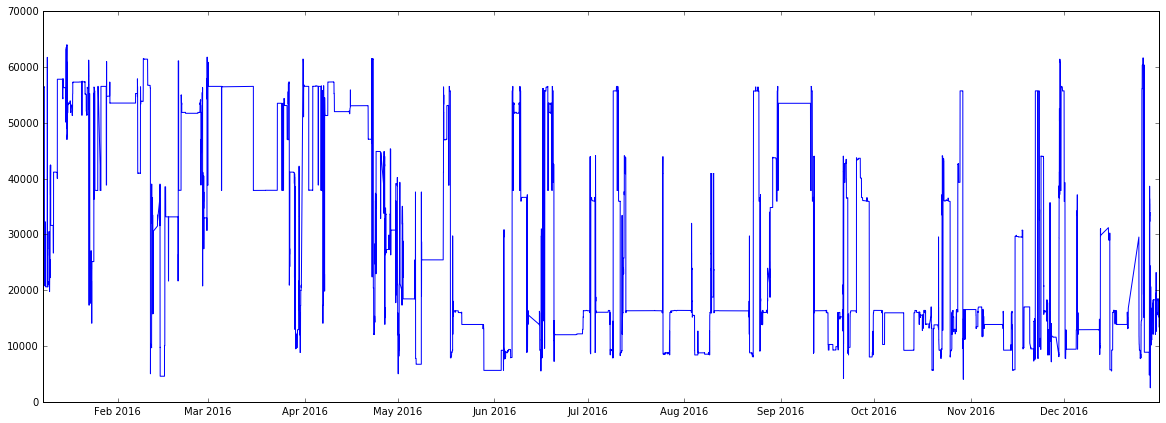

In [12]:
%matplotlib inline
eng468predictions = testModel.predict(eng468year2016X)
eng468predictionsDf = maintenanceEng468Df2016
eng468predictionsDf['predictions'] = pandas.DataFrame(eng468predictions,index=maintenanceEng468Df2016.index)
plt.figure(figsize=(20,7))
plt.plot(eng468predictionsDf['predictions'])
plt.show()

In [10]:
unindexed469year2016 = year2016Dataset.query('P_EngineSerial == 469')
maintenanceEng469Df2016 = pandas.DataFrame(pandas.rolling_mean(engOpDataset.query('P_EngineSerial == 469')['A_Temp_ExGasAvg'],rollingMeanSize))

for feature in ['A_Temp_ExGasTCOut','A_Press_BstAir','A_AnalogData_float1','A_AnalogData_int4']:
    maintenanceEng469Df2016[feature] = pandas.DataFrame(pandas.rolling_mean(unindexed469year2016.query('A_Temp_ExGasAvg > 0')[feature],rollingMeanSize),index=maintenanceEng469Df2016.index)
for feature in ['A_Temp_ExGasTCOut','A_Press_BstAir','A_AnalogData_float1','A_AnalogData_int4']:
    maintenanceEng469Df2016[feature] = pandas.DataFrame(pandas.rolling_mean(engOpDataset.query('P_EngineSerial == 469')[feature],rollingMeanSize))

maintenanceEng469Df2016 = maintenanceEng469Df2016[numpy.isfinite(maintenanceEng469Df2016['A_Temp_ExGasAvg'])]

dataset469RM2016 = maintenanceEng469Df2016.values
eng469year2016X = dataset469RM2016[:,0:5]

C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2500,center=False).mean()
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2500,center=False).mean()
C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2500,center=False).mean()


In [11]:
maintenanceEng469Df2016

,A_Temp_ExGasAvg,A_Temp_ExGasTCOut,A_Press_BstAir,A_AnalogData_float1,A_AnalogData_int4
P_SamplingDateTime,,,,,
2016-01-20 07:52:58,360.2340,322.6996,0.147970,180.80044,2207.9220
2016-01-20 07:53:58,360.3152,322.8028,0.147977,180.81984,2207.9216
2016-01-20 07:54:58,360.3444,322.8800,0.147982,180.83764,2207.9220
2016-01-20 07:55:58,360.3500,322.9388,0.147986,180.85364,2207.9204
2016-01-20 07:56:57,360.3460,322.9856,0.147990,180.86724,2207.9640
2016-01-20 07:57:57,360.3512,323.0296,0.147999,180.87904,2208.1436
2016-01-20 07:58:57,360.3728,323.0764,0.148015,180.89184,2208.5248
2016-01-20 07:59:57,360.4100,323.1276,0.148051,180.90484,2209.2300
2016-01-20 08:00:57,360.4548,323.1764,0.148096,180.91780,2210.0540


In [14]:
unindexed470year2016 = year2016Dataset.query('P_EngineSerial == 470')
maintenanceEng470Df2016 = pandas.DataFrame(pandas.rolling_mean(engOpDataset.query('P_EngineSerial == 470')['A_Temp_ExGasAvg'],rollingMeanSize))

for feature in ['A_Temp_ExGasTCOut','A_Press_BstAir','A_AnalogData_float1','A_AnalogData_int4']:
    maintenanceEng470Df2016[feature] = pandas.DataFrame(pandas.rolling_mean(unindexed470year2016.query('A_Temp_ExGasAvg > 0')[feature],rollingMeanSize),index=maintenanceEng470Df2016.index)
for feature in ['A_Temp_ExGasTCOut','A_Press_BstAir','A_AnalogData_float1','A_AnalogData_int4']:
    maintenanceEng470Df2016[feature] = pandas.DataFrame(pandas.rolling_mean(engOpDataset.query('P_EngineSerial == 470')[feature],rollingMeanSize))

maintenanceEng470Df2016 = maintenanceEng470Df2016[numpy.isfinite(maintenanceEng470Df2016['A_Temp_ExGasAvg'])]

dataset470RM2016 = maintenanceEng470Df2016.values
eng470year2016X = dataset470RM2016[:,0:5]
maintenanceEng470Df2016

C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2500,center=False).mean()
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2500,center=False).mean()
C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2500,center=False).mean()


,A_Temp_ExGasAvg,A_Temp_ExGasTCOut,A_Press_BstAir,A_AnalogData_float1,A_AnalogData_int4
P_SamplingDateTime,,,,,
2016-01-07 10:51:58,350.8088,325.2112,0.125183,162.89148,1622.5768
2016-01-07 10:52:58,350.9152,325.3296,0.125194,162.92108,1622.6620
2016-01-07 10:53:57,350.9720,325.4212,0.125206,162.94788,1622.7428
2016-01-07 10:54:57,351.0056,325.4988,0.125214,162.97248,1622.7716
2016-01-07 10:55:57,351.0100,325.5576,0.125219,162.99408,1622.7760
2016-01-07 10:56:57,351.0040,325.6032,0.125223,163.01268,1622.7788
2016-01-07 10:57:57,350.9960,325.6404,0.125228,163.02848,1622.7876
2016-01-07 10:58:57,350.9884,325.6724,0.125232,163.03968,1622.7976
2016-01-07 10:59:57,350.9816,325.7008,0.125235,163.04888,1622.8044


In [16]:
RMLEng469Data = pandas.read_csv('D:/Projects/MicroTec/Yanmar-Analysis/Datasets/PredictiveMaintenance/rml469Data.csv',sep=',')
datasetTrain = RMLEng469Data.values
X = datasetTrain[:,0:5]
Y = datasetTrain[:,5]
validationSize = 0.2
seed = 7
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size=validationSize,random_state=seed)

testModel = RandomForestRegressor()
testModel.fit(XTrain,YTrain)
testPredictions = testModel.predict(XTest)
print 'MSE: %.2f'%mean_squared_error(YTest,testPredictions)
print 'R-squared: %.2f'%r2_score(YTest,testPredictions)

MSE: 618574.52
R-squared: 1.00


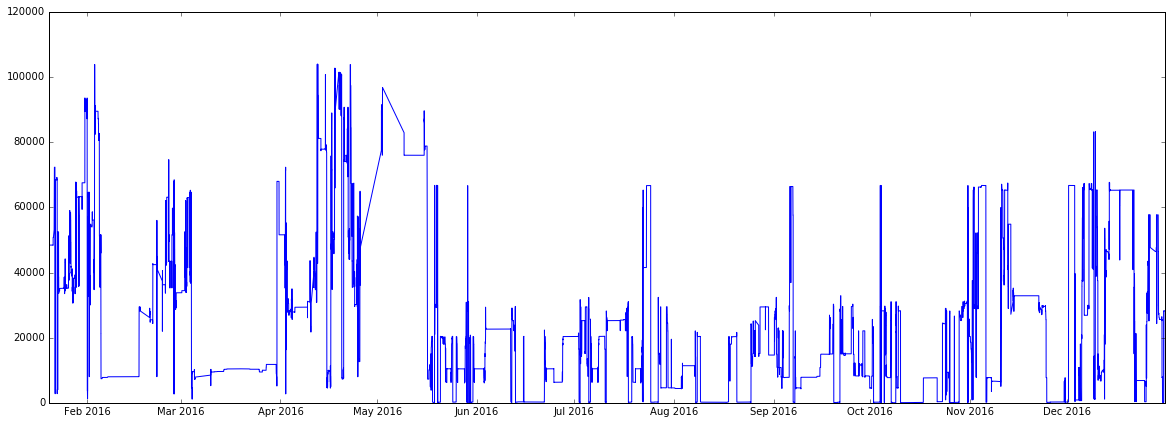

In [17]:
eng469predictions = testModel.predict(eng469year2016X)
eng469predictionsDf = maintenanceEng469Df2016
eng469predictionsDf['predictions'] = pandas.DataFrame(eng469predictions,index=maintenanceEng469Df2016.index)
plt.figure(figsize=(20,7))
plt.plot(eng469predictionsDf['predictions'])
plt.show()

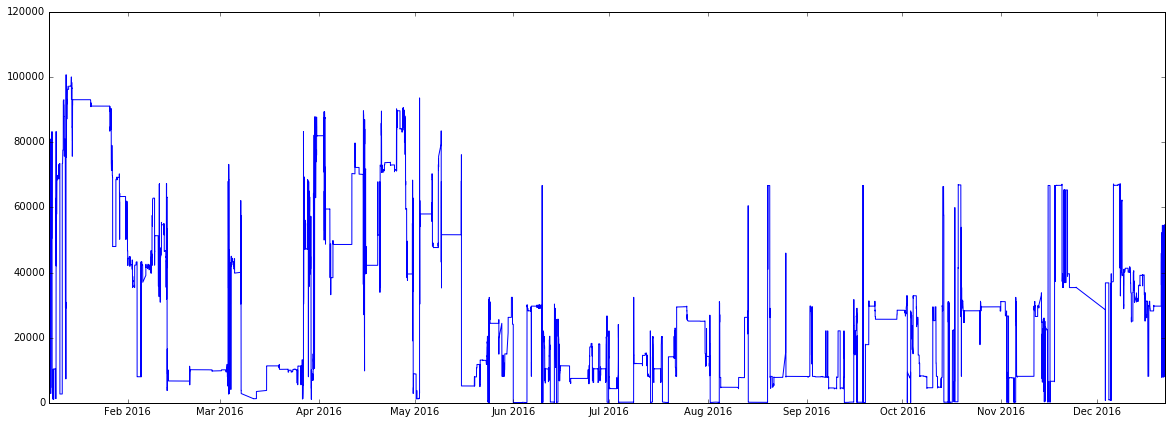

In [18]:
eng470predictions = testModel.predict(eng470year2016X)
eng470predictionsDf = maintenanceEng470Df2016
eng470predictionsDf['predictions'] = pandas.DataFrame(eng470predictions,index=maintenanceEng470Df2016.index)
plt.figure(figsize=(20,7))
plt.plot(eng470predictionsDf['predictions'])
plt.show()

C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5000,center=False).mean()


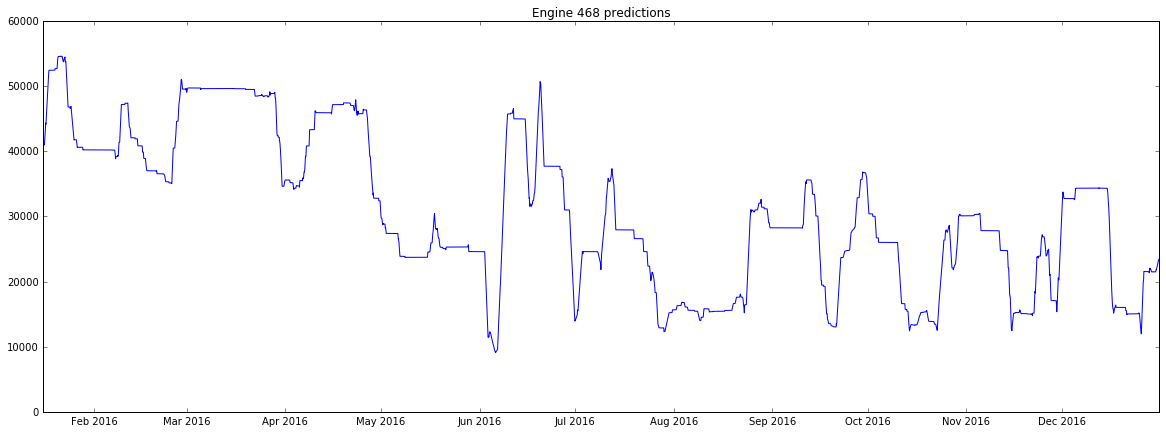

In [23]:
#Predictions rolling mean
plt.figure(figsize=(20,7))
plt.title('Engine 468 predictions')
plt.plot(pandas.DataFrame(pandas.rolling_mean(eng468predictionsDf['predictions'],5000),index=maintenanceEng468Df2016.index))
plt.show()

C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5000,center=False).mean()
  app.launch_new_instance()


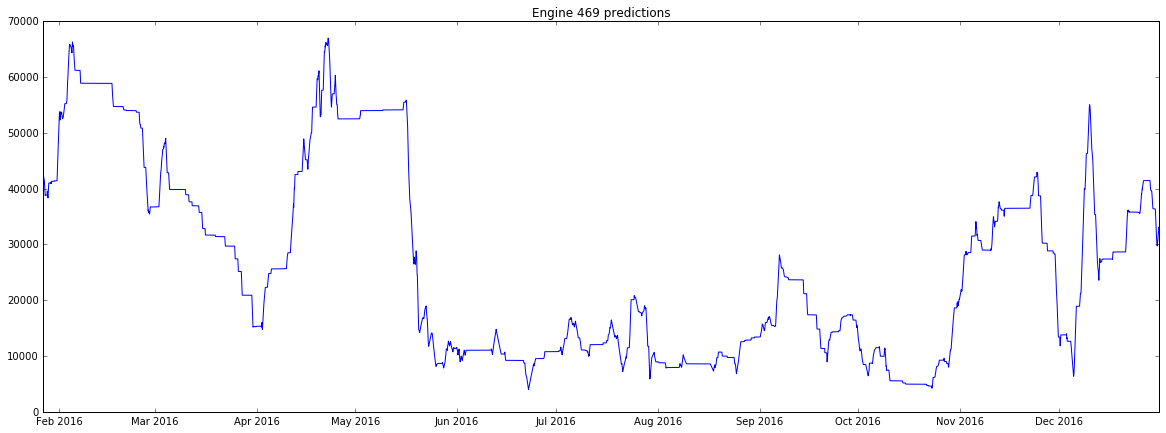

In [27]:
plt.figure(figsize=(20,7))
plt.title('Engine 469 predictions')
plt.plot(pandas.DataFrame(pandas.rolling_mean(eng469predictionsDf['predictions'],5000),index=maintenanceEng469Df2016.index))
plt.show()

C:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5000,center=False).mean()


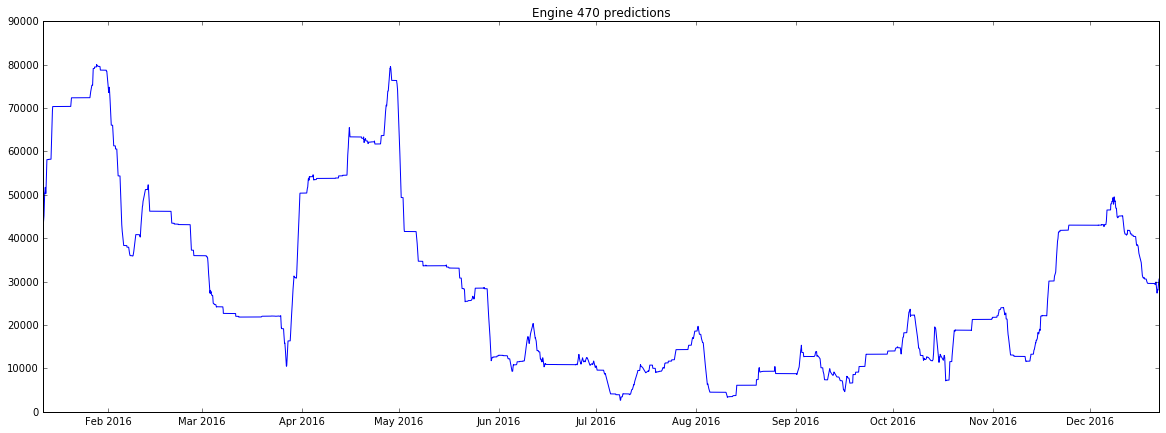

In [26]:
#Predictions rolling mean
plt.figure(figsize=(20,7))
plt.title('Engine 470 predictions')
plt.plot(pandas.DataFrame(pandas.rolling_mean(eng470predictionsDf['predictions'],5000),index=maintenanceEng470Df2016.index))
plt.show()